In [1]:
import math

from tqdm import tqdm

import numpy as np

from matplotlib import pyplot as plt
from IPython.display import HTML

from matk.utils.animation import animate_frames
from matk.models.tree_burn import TreeBurnModel, F, T, B, L

%matplotlib inline

In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /

In [2]:
BIG_STEPS = 1_000_000

# Task 1 (Var ...)

# Task 2 (Var 2)

## Base model

In [18]:
tree_burn_model = TreeBurnModel(
    field_size=(512,512), 
    forest_density=0.75, 
    activate_wind=True, 
    vertical_wind=-20, horizontal_wind=0,
    n_lakes=5,
    lake_area=100
)

In [19]:
tree_burn_model.run_n_steps(BIG_STEPS)

  0%|          | 602/1000000 [00:04<1:51:10, 149.83it/s]


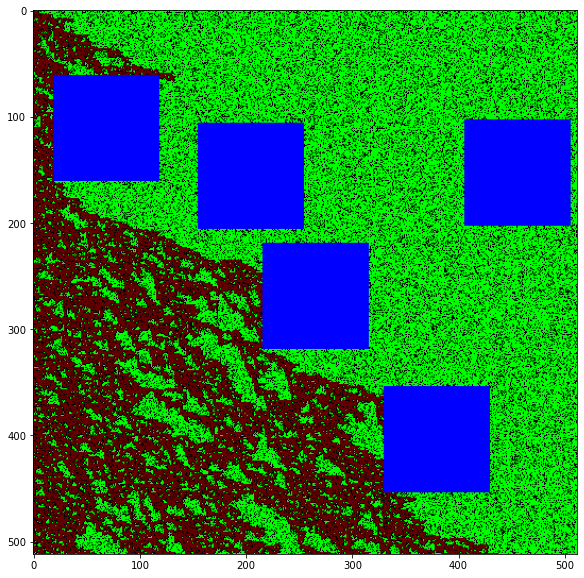

In [20]:
plt.figure(figsize=(10,10))
plt.imshow(tree_burn_model[-1])

# Experiments with base (no wind and lakes)

In [8]:
def make_exp_base(model_config):
    density_space = np.linspace(0.001, 1, num=100)
    survive_space = []

    for density in tqdm(density_space):
        model_config['forest_density'] = density
        temp_model = TreeBurnModel(**model_config)
        temp_model.run_n_steps(BIG_STEPS, verbose=False)
        survive_percent = temp_model.action_history[-1][:,:,T].sum() / temp_model.action_history[0][:,:,T].sum()
        survive_space.append(survive_percent)

    survive_space = np.array(survive_space)
    return density_space, survive_space

In [9]:
exp_x, exp_y = make_exp_base(dict(
    field_size=(512,512), 
    activate_wind=False, 
    n_lakes=0,
))

100%|██████████| 100/100 [03:05<00:00,  1.86s/it]


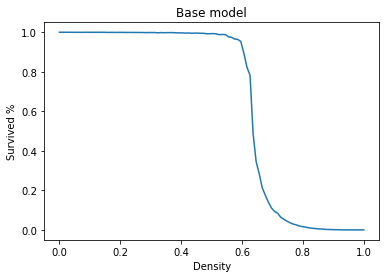

In [17]:
plt.title('Base model')
plt.plot(exp_x, exp_y)
plt.xlabel('Density')
plt.ylabel('Survived %')
plt.show()

# Experiments with wind (down side -20) (no lakes) 

In [23]:
exp_x_wind, exp_y_wind = make_exp_base(dict(
    field_size=(512,512), 
    activate_wind=True,
    vertical_wind=-20,
    n_lakes=0,
))

100%|██████████| 100/100 [02:44<00:00,  1.65s/it]


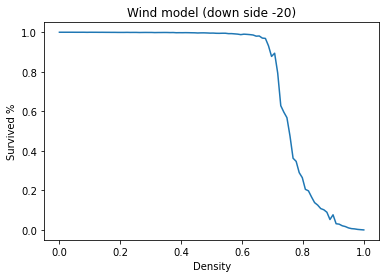

In [24]:
plt.title('''Wind model (down side -20)''')
plt.plot(exp_x_wind, exp_y_wind)
plt.xlabel('Density')
plt.ylabel('Survived %')
plt.show()

# Experiments with lakes (no wind) 

In [39]:
def make_exp_lake(model_config):
    density_space = np.linspace(0.001, 1, num=100)
    lake_space = range(10, 130, 10)
    
    survive_space = []
    new_density_space = []
    new_lake_space = []

    for lake_area in tqdm(lake_space):
        for density in density_space:
            model_config['forest_density'] = density
            model_config['lake_area'] = lake_area
            temp_model = TreeBurnModel(**model_config)
            temp_model.run_n_steps(BIG_STEPS, verbose=False)
            survive_percent = temp_model.action_history[-1][:,:,T].sum() / temp_model.action_history[0][:,:,T].sum()
            survive_space.append(survive_percent)
            new_density_space.append(density)
            new_lake_space.append(lake_area)

    survive_space = np.array(survive_space)
    new_lake_space = np.array(new_lake_space)
    new_density_space = np.array(new_density_space)
    return new_density_space, new_lake_space, survive_space

In [40]:
exp_x_lake, exp_y_lake, exp_z_lake = make_exp_lake(dict(
    field_size=(512,512), 
    activate_wind=False,
    n_lakes=5,
))

100%|██████████| 12/12 [39:55<00:00, 199.66s/it]


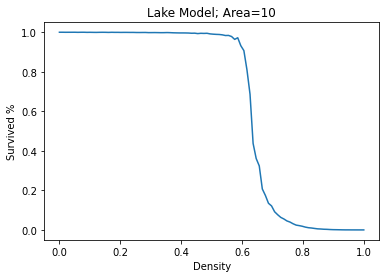

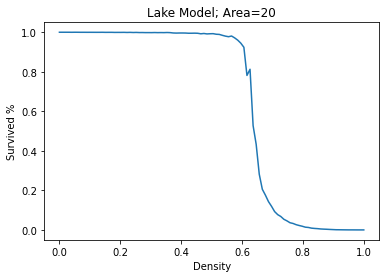

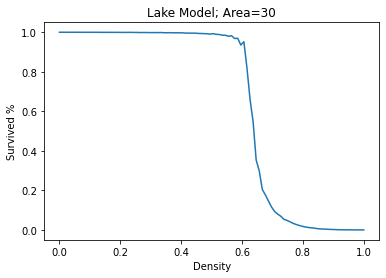

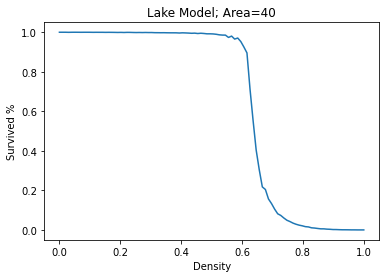

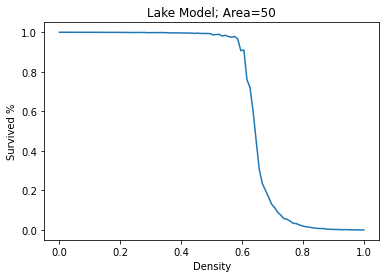

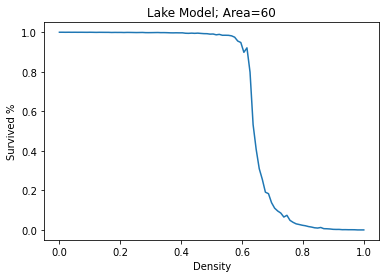

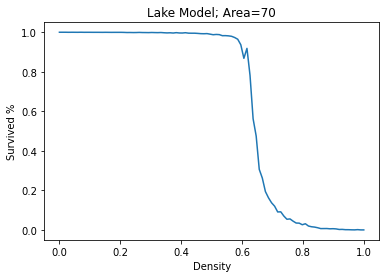

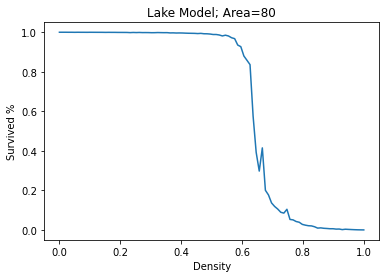

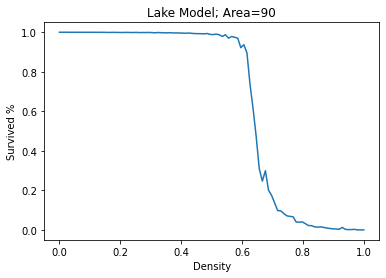

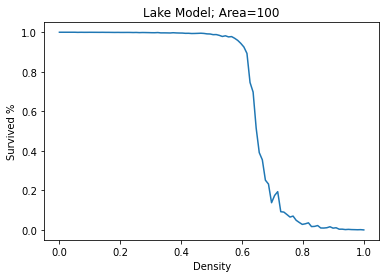

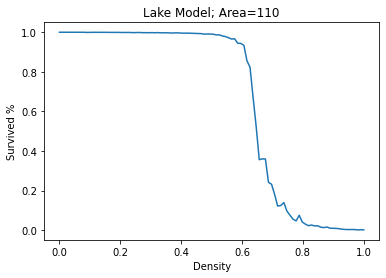

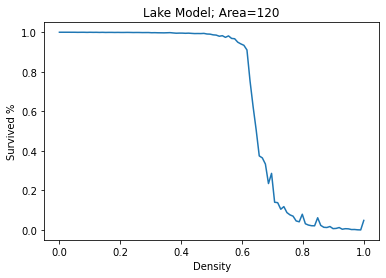

In [47]:
for lake_ar in np.unique(exp_y_lake):
    temp_x = exp_x_lake[exp_y_lake == lake_ar]
    temp_y = exp_z_lake[exp_y_lake == lake_ar]
    plt.title(f"Lake Model; Area={lake_ar}")
    plt.plot(temp_x, temp_y)
    plt.xlabel('Density')
    plt.ylabel('Survived %')
    plt.show()